In [50]:
#importing the required packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sys
print(sys.executable)
import altair as alt
from tkinter import *
%matplotlib inline
sns.set()
from subprocess import check_output
import altair as alt
alt.renderers.names()
alt.renderers.enable('json')
alt.renderers.enable('default')

# Ignore warning related to pandas_profiling
import warnings                                           
warnings.filterwarnings('ignore') 

# Define Function to add data to plot
def annot_plot(ax,w,h):                                   
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
         textcoords='offset points') 
#Default Render
def default_renderer(spec):
    bundle = {}
    metadata = {}
    bundle['text/plain'] = '<VegaLite object>'
    bundle['mime_type'] = 'application/vnd.vegalite.v2+json'
    return bundle, metadata

pd.set_option('display.max_columns', 30)

C:\Users\Lenovo\Anaconda3\python.exe


In [35]:
#Dataset File Path Location
data = pd.read_csv('C:/Users/Lenovo/Desktop/FIFA.DATA.csv')

In [36]:
#Read the Data headings
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,...,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,...,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,...,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,...,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,...,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [37]:
# Get the Column Names and Entries Counts and create the Heat Map Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

In [38]:
#Sum of Columns
data.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [39]:
#To get the unique elements in dataset
data.nunique() 

ID                          18207
Name                        17194
Age                            29
Photo                       18207
Nationality                   164
Flag                          164
Overall                        48
Potential                      47
Club                          651
Club Logo                     679
Value                         217
Wage                          144
Special                      1422
Preferred Foot                  2
International Reputation        5
Weak Foot                       5
Skill Moves                     5
Work Rate                       9
Body Type                      10
Real Face                       2
Position                       27
Jersey Number                  99
Joined                       1736
Loaned From                   341
Contract Valid Until           36
Height                         21
Weight                         57
LS                             93
ST                             93
RS            

In [40]:
#Choose Specific Columns
Heatmap_Columns = [
    'Name',
    'Age',
    'Nationality',
    'Overall',
    'Potential',
    'Special',
    'Acceleration',
    'Aggression',
    'Agility',
    'Balance',
    'BallControl',
    'Body Type',
    'Composure',
    'Crossing',
    'Curve',
    'Club',
    'Dribbling',
    'FKAccuracy',
    'Finishing',
    'GKDiving',
    'GKHandling',
    'GKKicking',
    'GKPositioning',
    'GKReflexes',
    'HeadingAccuracy',
    'Interceptions',
    'International Reputation',
    'Jersey Number',
    'Jumping',
    'Joined',
    'LongPassing',
    'LongShots',
    'Marking',
    'Penalties',
    'Position',
    'Positioning',
    'Preferred Foot',
    'Reactions',
    'ShortPassing',
    'ShotPower',
    'Skill Moves',
    'SlidingTackle',
    'SprintSpeed',
    'Stamina',
    'StandingTackle',
    'Strength',
    'Value',
    'Vision',
    'Volleys',
    'Wage',
    'Weak Foot',
    'Work Rate'
]

In [41]:
#Assign New columns to Heatmap_df data frame
Heatmap_df = pd.DataFrame(data, columns = Heatmap_Columns)

In [42]:
Heatmap_df.head()

,Name,Age,Nationality,Overall,Potential,Special,Acceleration,Aggression,Agility,Balance,BallControl,Body Type,Composure,Crossing,Curve,...,Reactions,ShortPassing,ShotPower,Skill Moves,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Value,Vision,Volleys,Wage,Weak Foot,Work Rate
0,L. Messi,31,Argentina,94,94,2202,91.0,48.0,91.0,95.0,96.0,Messi,96.0,84.0,93.0,...,95.0,90.0,85.0,4.0,26.0,86.0,72.0,28.0,59.0,€110.5M,94.0,86.0,€565K,4.0,Medium/ Medium
1,Cristiano Ronaldo,33,Portugal,94,94,2228,89.0,63.0,87.0,70.0,94.0,C. Ronaldo,95.0,84.0,81.0,...,96.0,81.0,95.0,5.0,23.0,91.0,88.0,31.0,79.0,€77M,82.0,87.0,€405K,4.0,High/ Low
2,Neymar Jr,26,Brazil,92,93,2143,94.0,56.0,96.0,84.0,95.0,Neymar,94.0,79.0,88.0,...,94.0,84.0,80.0,5.0,33.0,90.0,81.0,24.0,49.0,€118.5M,87.0,84.0,€290K,5.0,High/ Medium
3,De Gea,27,Spain,91,93,1471,57.0,38.0,60.0,43.0,42.0,Lean,68.0,17.0,21.0,...,90.0,50.0,31.0,1.0,13.0,58.0,43.0,21.0,64.0,€72M,68.0,13.0,€260K,3.0,Medium/ Medium
4,K. De Bruyne,27,Belgium,91,92,2281,78.0,76.0,79.0,77.0,91.0,Normal,88.0,93.0,85.0,...,91.0,92.0,91.0,4.0,51.0,76.0,90.0,58.0,75.0,€102M,94.0,82.0,€355K,5.0,High/ High


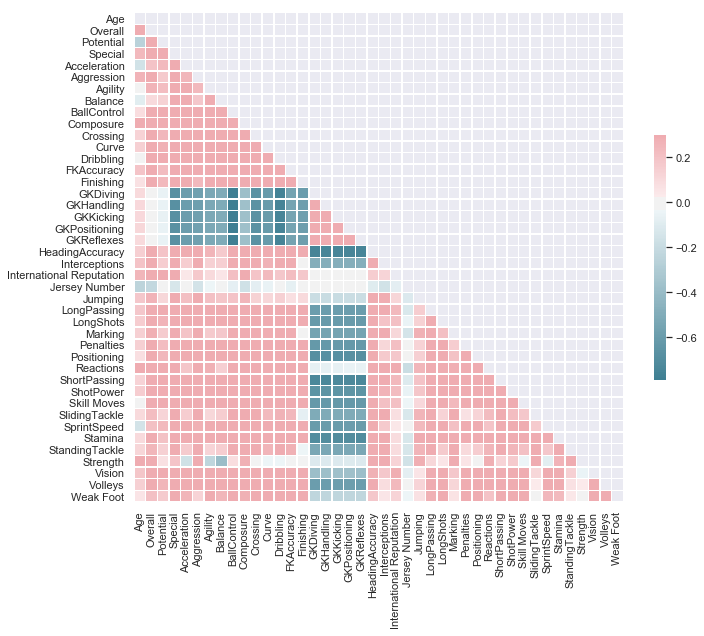

In [43]:
from IPython.core.display import HTML,display
#Create a Correlation Plot to Visualize the Selected Columns
corr = Heatmap_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

display(HTML('<em>The graph represents the heat map in square format which helps to identify the key strengths of the players</em>'))

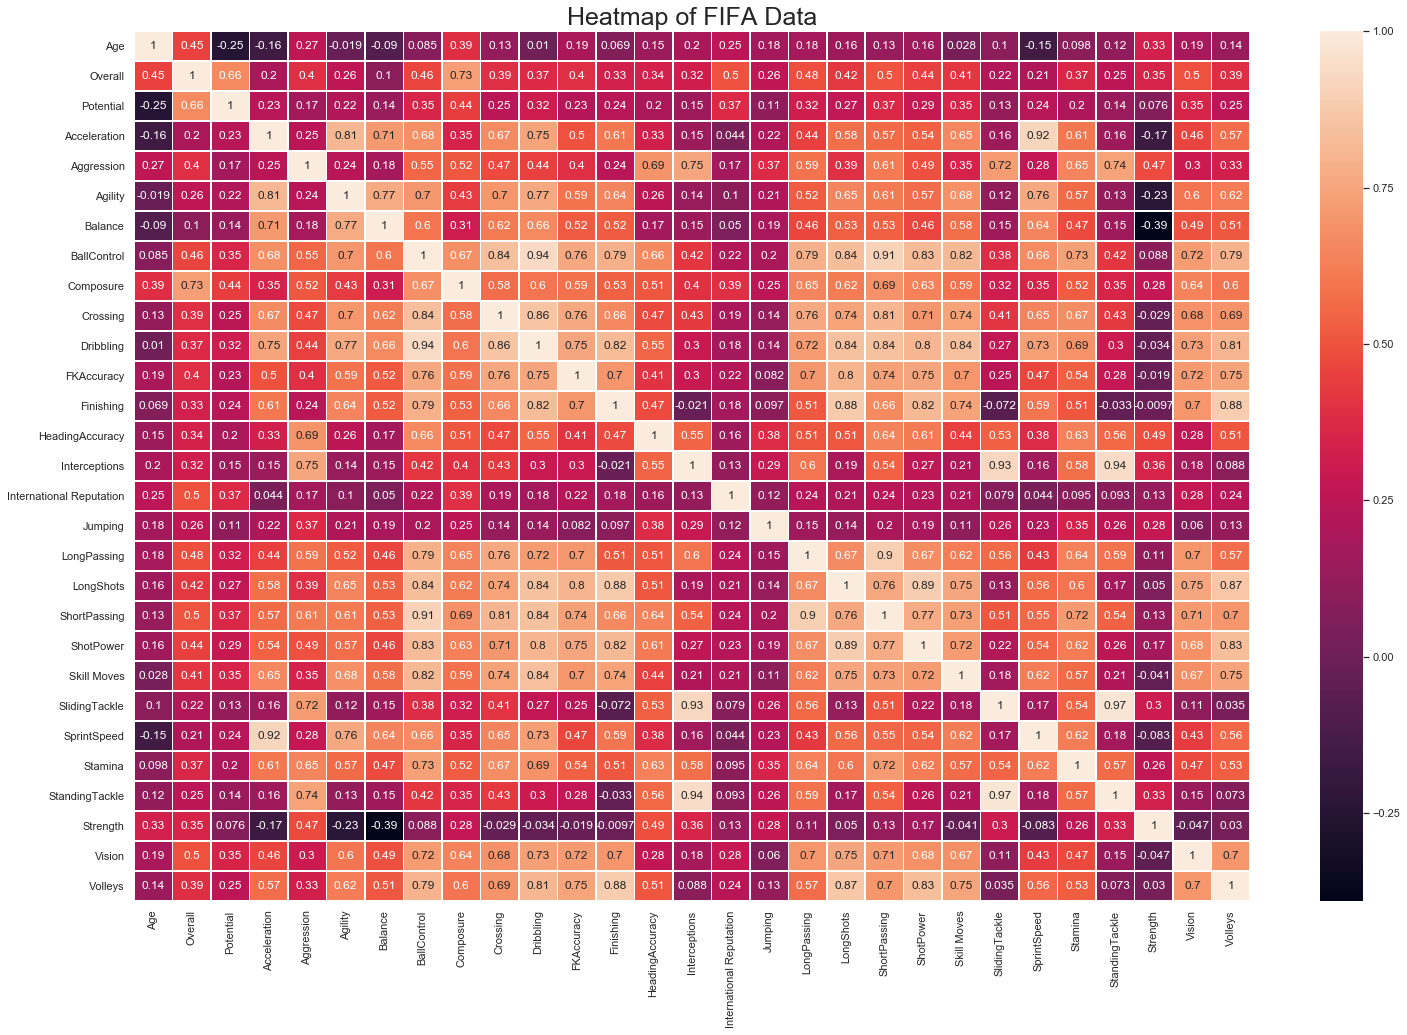

In [44]:

#Creation of Heatmap for Specific Columns
Heatmap_df = Heatmap_df[['Age', 'Overall', 'Potential', 'Value', 'Wage',
                'Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 
                'Body Type','Composure', 'Crossing','Dribbling', 'FKAccuracy', 'Finishing', 
                'HeadingAccuracy', 'Interceptions','International Reputation',
                'Joined', 'Jumping', 'LongPassing', 'LongShots',
                'ShortPassing', 'ShotPower', 'Skill Moves', 'SlidingTackle',
                'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength', 'Vision',
                'Volleys']]
corr = Heatmap_df.corr()
plt.figure(figsize = (25,16))
heatmap = sns.heatmap(corr,annot = True, linewidths=.5)
layout=heatmap.set_title(label='Heatmap of FIFA Data', fontsize=25)
plt.show()
display(HTML('<em>The graph represents the heat map of complete FIFA DATA which helps to identify the key details of the players</em>'))

In [46]:
x#Select Top To Countries to Visualize 
countries_d = data['Nationality'].value_counts().head(10).index.values
countries_data_top = data.loc[data['Nationality'].isin(countries_d), :]

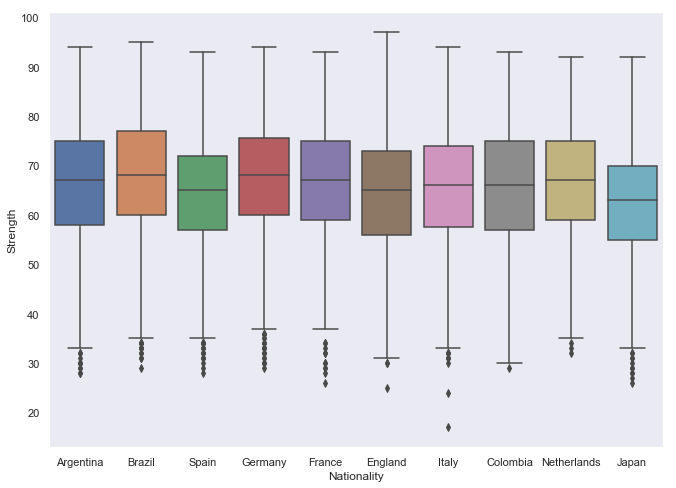

In [56]:
#Box Plot of Top ten countires against the Strength of Players
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
#import plotly.graph_objs as go

sns.set(style="dark")
plt.figure(figsize=(11, 8))
p = sns.boxplot(x = 'Nationality', y = 'Strength', data = countries_data_top)
default_renderer(200)
display(HTML('<em>In this boxplot we are visualizing the top ten countries against the strength of players. This helps for the Managers / Betting Agency to decide the strog players country wise</em>'))

In [105]:
#Convert Numerics /Characters
data['Wage'] = data['Wage'].apply(lambda x: int(re.findall('\d+', x)[0] + '000'))
data['Value'] = data['Value'].apply(lambda x: 'M' in x and int((re.findall('\d+\.*\d*', x)[0] + '000000').replace('.', '')) or int((re.findall('\d+\.*\d*', x)[0] + '000').replace('.', '')))

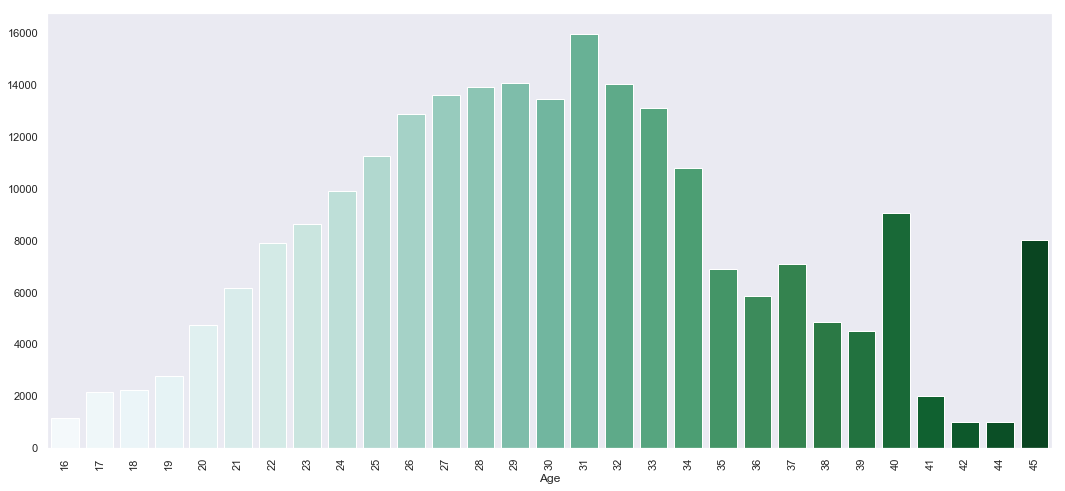

In [147]:
#Age Vs WAGES
Age_Wages = data.groupby('Age')['Wage'].mean()
plt.figure(figsize=(18,8))
p = sns.barplot(x = Age_Wages.index, y = Age_Wages.values,palette='BuGn')
p = plt.xticks(rotation=90)

display(HTML('<em>This Visualization helps to check the Wages in accordance to the Age of Players and helps to see if any correlation exists between age and wages<em>'))

In [47]:
# function to add data to plot
def New_Plot(ax,w,h):                                    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

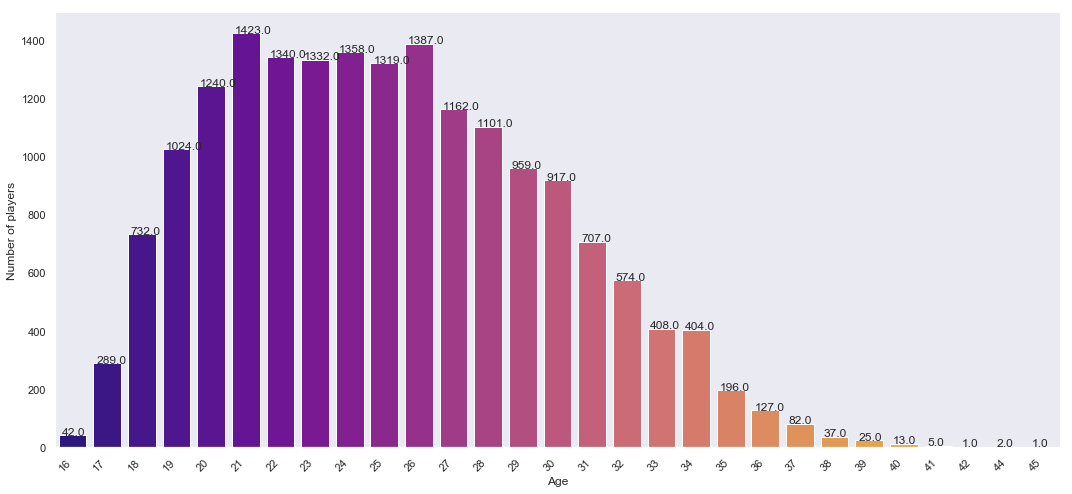

In [144]:
df = pd.DataFrame(data)
plt.figure(figsize=(18,8))
ax = sns.countplot('Age', data = df,palette='plasma')
plt.ylabel('Number of players')
plt.xticks(rotation = 45, ha = 'right')
New_Plot(ax,0.08,1)
display(HTML('<em>In this graph we are visualizing the number of players across multiple age groups</em>'))

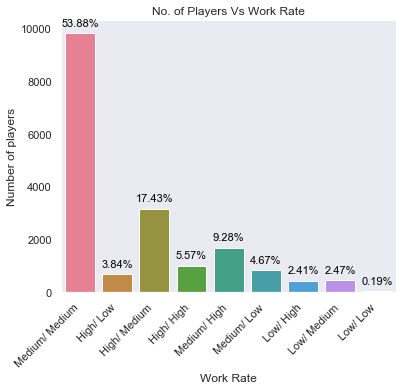

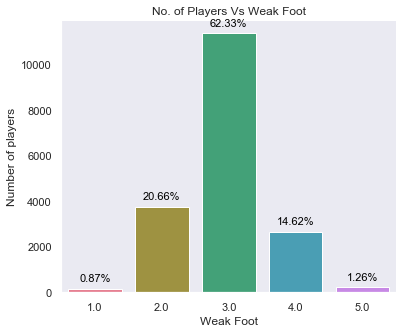

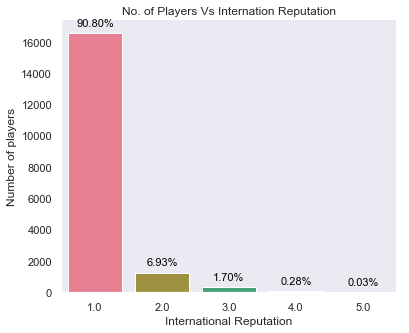

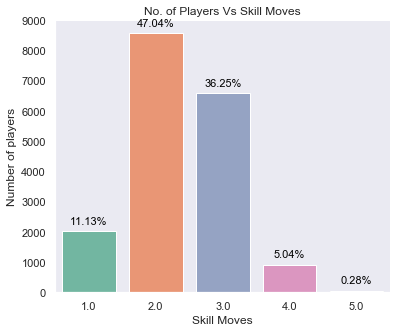

In [61]:
df = pd.DataFrame(data)

import matplotlib.pyplot as plt
from matplotlib import interactive


plt.figure(figsize=(6,5))
ax = sns.countplot('Work Rate', data = data,palette='husl')
plt.ylabel('Number of players')
plt.xticks(rotation = 45, ha = 'right')
annot_plot(ax,0.08,1)

interactive(True)
plt.title('No. of Players Vs Work Rate')
plt.show() 

plt.figure(figsize=(6,5))
ax = sns.countplot('Weak Foot', data = data,palette='husl')
plt.ylabel('Number of players')
annot_plot(ax,0.08,1)
plt.title('No. of Players Vs Weak Foot')
plt.show()

plt.figure(figsize=(6,5))
ax = sns.countplot('International Reputation', data = data,palette='husl',)
plt.ylabel('Number of players')
annot_plot(ax,0.08,1)
plt.title('No. of Players Vs Internation Reputation')

interactive(False)
plt.figure(figsize=(6,5))
ax = sns.countplot('Skill Moves', data = data,palette='Set2')
plt.ylabel('Number of players')
annot_plot(ax,0.08,1)
plt.title('No. of Players Vs Skill Moves')
plt.show()


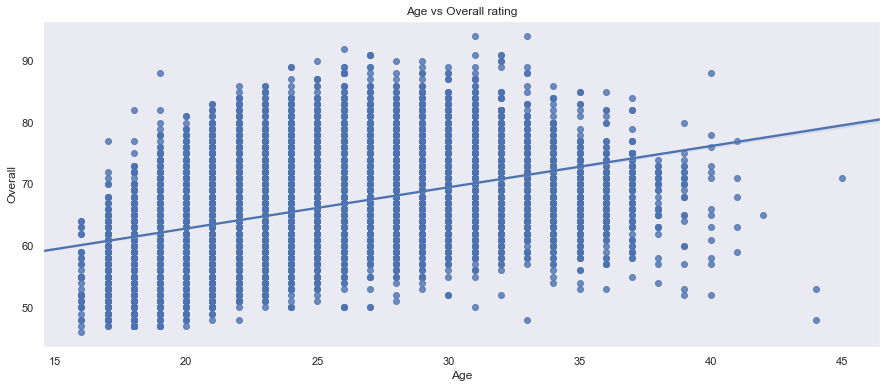

In [114]:
plt.figure(1 , figsize = (15 , 6))
sns.regplot(data['Age'] , data['Overall'])
plt.title('Age vs Overall rating')
plt.show()
display(HTML('<em>In this graph we are visualizing the Players Age across the Overall Rating. This helps to identify if there is any relation exists between the players age and overall rating</em>'))

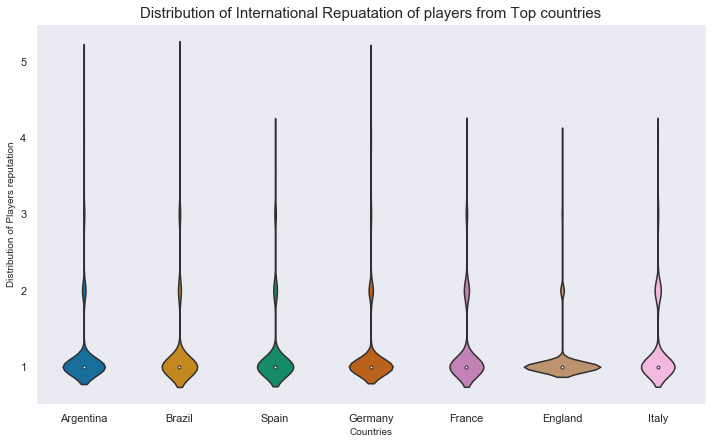

In [112]:
Top_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(Top_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Countries', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Players reputation', fontsize = 10)
ax.set_title(label = 'Distribution of International Repuatation of players from Top countries', fontsize = 15)
plt.show()

display(HTML('<em>We picked the top ten countries and visualized the Players International Reputation </em>'))

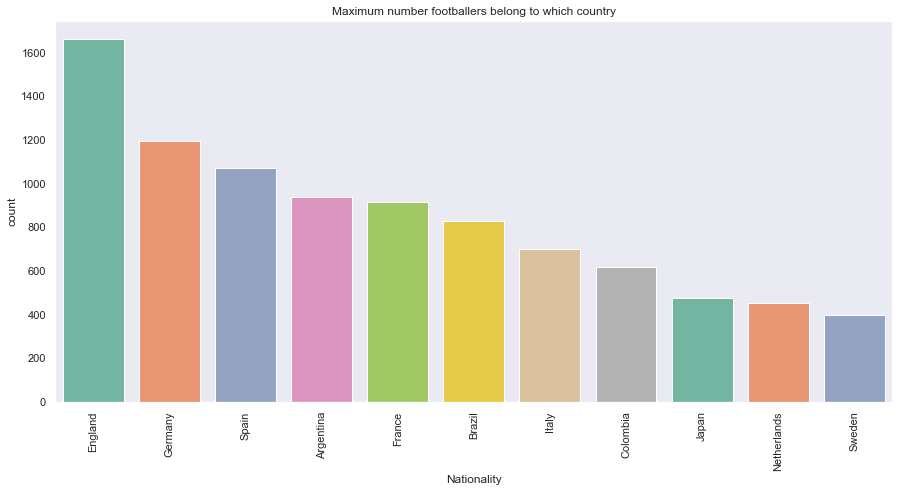

In [134]:
from IPython.core.display import HTML,display
import random
from collections import Counter as counter
plt.figure(1 , figsize = (15 , 7))
countries = []
c = counter(data['Nationality']).most_common()[:11]
for n in range(11):
    countries.append(c[n][0])

sns.countplot(x  = 'Nationality' ,
              data = data[data['Nationality'].isin(countries)] ,
              order  = data[data['Nationality'].isin(countries)]['Nationality'].value_counts().index , 
             palette = 'Set2') 
plt.xticks(rotation = 90)
plt.title('Maximum number footballers belong to which country' )
plt.show()
display(HTML('<em>Visualizing the maximum number of players from multiple countries. England has the highest number of players. This helps for any betting agency to focus their business region wise</em>'))

In [56]:
#Top 10 Players
sorted_players = data.sort_values(["Value"], ascending=False).head(10)
players = sorted_players[["Photo" ,"Name" ,"Age" ,"Nationality" ,"Club", "Value"]].values


In [119]:
from IPython.display import HTML, display

table_content = ''
for row in players:
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[0]) + '"style="width:50px;height:50px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[2]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[5]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML(
    '<table><tr><th>Photo</th><th>Name</th><th>Age</th><th>Nationality</th><th>Club</th><th>Value</th></tr>{}</table>'.format(table_content))
)
display(HTML('<em>Visualizing Top 10 players with their photo and Value details </em>'))

Photo,Name,Age,Nationality,Club,Value
,Neymar Jr,26,Brazil,Paris Saint-Germain,1185000000
,L. Messi,31,Argentina,FC Barcelona,1105000000
,H. Kane,24,England,Tottenham Hotspur,835000000
,T. Kroos,28,Germany,Real Madrid,765000000
,C. Eriksen,26,Denmark,Tottenham Hotspur,735000000
,Isco,26,Spain,Real Madrid,735000000
,Coutinho,26,Brazil,FC Barcelona,695000000
,J. Rodríguez,26,Colombia,FC Bayern München,695000000
,M. Salah,26,Egypt,Liverpool,695000000
,S. Agüero,30,Argentina,Manchester City,645000000
